In [53]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv2

In [54]:
def convert_to_grey(image):
    if len(image.shape) == 3:
        grey_image =np.mean(image, axis=2).astype(np.uint8)
        return grey_image
    return image

In [55]:
def make_histogram(image):
    pixel_values = np.zeros(256)
    height, width = image.shape
    for i in range(height):
        for j in range(width):
            pixel_values[image[i][j]] +=1
    return pixel_values

In [56]:
image = plt.imread('lena.jpg')
grey_image = convert_to_grey(image)
grey_image = cv2.resize(grey_image, (512,512))

In [57]:
# plt.imshow(grey_image, cmap='gray')
# plt.show()

In [58]:
pixel_values = make_histogram(grey_image)

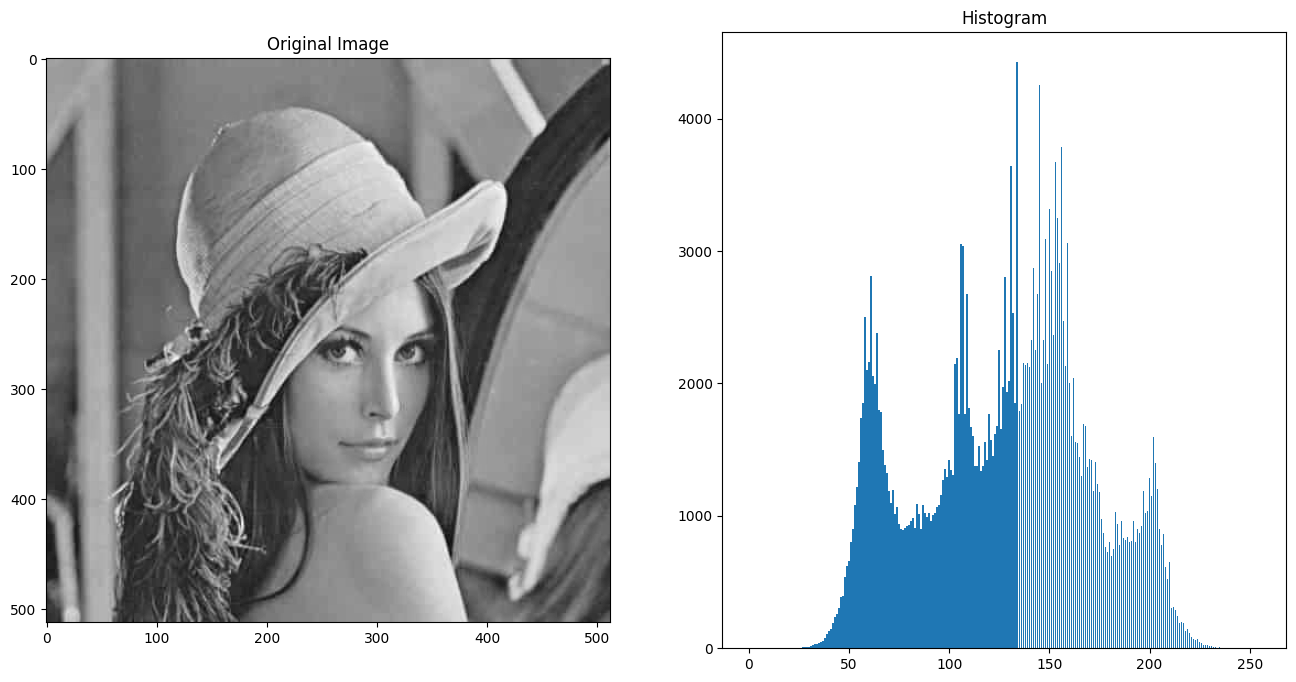

In [59]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(grey_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.bar(range(256), pixel_values)
plt.title('Histogram')
plt.show()

In [60]:
# plt.figure(figsize=(16,8))
# plt.bar(range(256), pixel_values)
# plt.title('Histogram')
# plt.show()

In [61]:
threshold = int(input('Give the threshold value for segmentation'))
print(threshold)

125


In [62]:
def segment_image(image, threshold):
    height, width = image.shape
    segmented_image = image.copy()
    for i in range(height):
        for j in range(width):
            if(image[i][j] <= threshold):
                segmented_image[i][j] = 0
            else:
                segmented_image[i][j] = 255

    return segmented_image

In [63]:
segmented_image = segment_image(grey_image, threshold)

In [64]:
# plt.imshow(segmented_image, cmap='gray')

In [65]:
segmented_image_histogram = make_histogram(segmented_image)

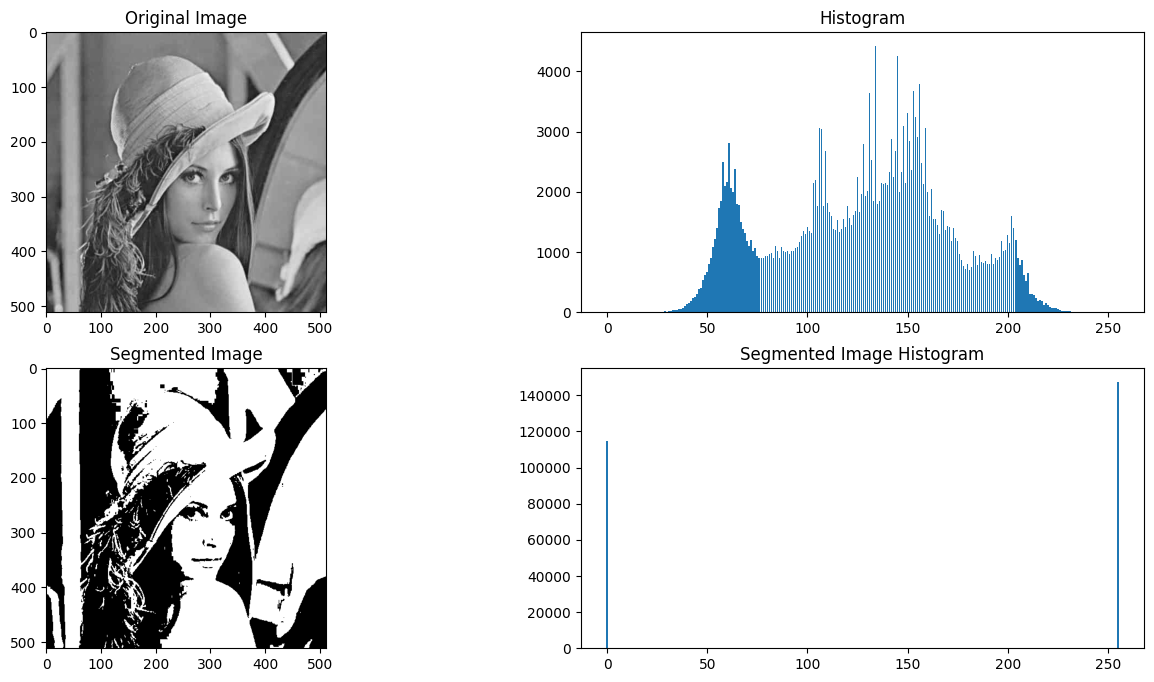

In [66]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.subplot(2,2,1)
plt.imshow(grey_image, cmap='gray')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.bar(range(256), pixel_values)
plt.title('Histogram')
plt.subplot(2,2,3)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')
plt.subplot(2,2,4)
plt.bar(range(256), segmented_image_histogram)
plt.title('Segmented Image Histogram')
plt.show()